![](http://take.ms/XaUPm)
![](http://take.ms/1GV9l)
![](http://take.ms/Bl6FR)
![](http://take.ms/1fIFP)
![](http://take.ms/hbueY)
![](http://take.ms/C213V)

In [1]:
sigma1 = 1
sigma2 = seq(from = 0.5, to = 2, by = 0.01)
p1=p2 = seq(from = 0, to = 1, by = 0.01)
n1=n2 = 50

N <- length(p1)
M <- length(sigma2)

In [2]:
generate.X1 <- function(n1, sigma1, p1) {
    F1 <- runif(n1, min = -3, max = 3)
    X1.weight <- runif(n1)

    X1.Norm.ind.matr <- matrix(unlist(lapply(p1, function(p) X1.weight <= p)), nrow = length(X1.weight))
    X1.F1.ind.mart <- !X1.Norm.ind.matr

    X1.F1 <- F1*X1.F1.ind.mart
        
    X1.Norm <- rnorm(n1, mean = 0, sd = sigma1)
    X1 <- t(X1.Norm*X1.Norm.ind.matr + X1.F1)
    
    return(X1)
    
    
    ###
    F1 <- runif(n1, min = -3, max = 3)
    X1.weight <- runif(n1)

    X1.Norm.ind.matr <- matrix(unlist(lapply(p1, function(p) X1.weight <= p)), nrow = length(X1.weight))
    X1.F1.ind.mart <- !X1.Norm.ind.matr

    X1.F1 <- F1*X1.F1.ind.mart
    
    X1.Norm <- rnorm(n1, mean = 0, sd = sigma1)
    X1 <- t(X1.Norm*X1.Norm.ind.matr + X1.F1)
        
    return(X1)
}

In [3]:
generate.X2n <- function(n2, sigma2, p2, weights) {
    F2 <- runif(n2, min = -3, max = 3)
    X2.weight <- runif(n2)

    X2.Norm.ind.matr <- matrix(unlist(lapply(p2, function(p) X2.weight <= p)), nrow = length(X2.weight))
    X2.F2.ind.mart <- !X2.Norm.ind.matr

    X2.F2 <- F2*X2.F2.ind.mart
        
    # Генерируем матрицу, в строках которой будут выбороки из
    # нормального распределения с sigma2[ind], где ind номер строки матрицы
    X2.norm.matr <- matrix(rnorm(n2*length(sigma2), mean = 0, sd = sigma2), nrow=length(sigma2))

    # Разделяем матрицу выборок на список выборок
    X2.norm.list <- split(X2.norm.matr, 1:length(sigma2))

    # Для каждой конкретной выборки X2.norm создаем  X2
    X2n <- lapply(X2.norm.list, function(X2.norm) t(X2.Norm.ind.matr*X2.norm + X2.F2))
    
    return(X2n)
    
    #### 
    F2 <- runif(n2, min = -3, max = 3)
    X2.weight <- runif(n2)

    X2.Norm.ind.matr <- matrix(unlist(lapply(p2, function(p) X2.weight <= p)), nrow = length(X2.weight))
    X2.F2.ind.mart <- !X2.Norm.ind.matr

    X2.F2 <- F2*X2.F2.ind.mart
        
    # Генерируем матрицу, в строках которой будут выбороки из
    # нормального распределения с sigma2[ind], где ind номер строки матрицы
    X2.norm.matr <- matrix(rnorm(n2*length(sigma2), mean = 0, sd = sigma2), nrow=length(sigma2))

    # Разделяем матрицу выборок на список выборок
    X2.norm.list <- split(X2.norm.matr, 1:length(sigma2))

    # Для каждой конкретной выборки X2.norm создаем  X2
    # В строках - матрица выборкок по p
    X2n <- lapply(X2.norm.list, function(X2.norm) t(X2.Norm.ind.matr*X2.norm + X2.F2))
        
    return(X2n)
}

In [4]:
compute.p.value <- function(n1, n2, p1, p2, sigma1, sigma2) {
    X1 <- generate.X1(n1, sigma1, p1)
    X2n <- generate.X2n(n2, sigma2, p2)
    
    # список выборок из X1
    X1.list <- split(X1, 1:N)
    
    # Список по сигма, списокв по p
    X2n.list <- lapply(X2n, function(X2) split(X2,  1:N))
        
    # Список по сигма, списков пар X1,X2 по p 
    X2n.X1 <- lapply(X2n.list, function(X2.list) split(t(rbind(X1.list, X2.list)), 1:N))
        
    p.value.matr <- lapply(X2n.X1, function(X.sigm) 
        lapply(X.sigm, function(X) var.test(unlist(X[1]), unlist(X[2]))$p.value)
    )

    PV_M <- matrix(unlist(p.value.matr), nrow=N, ncol=M)
    PW_M <- PV_M < 0.05

    return(list(PV_M, PW_M))
}

In [7]:
PV_M  <- rep(0, N * M)
PW_M  <- rep(0, N * M)

exps <- 10

for(i in 1:exps)  # for each row
{
    print(i)
    ans <- compute.p.value(n1, n2, p1, p2, sigma1, sigma2)
    PV_M <- PV_M + ans[[1]]
    PW_M <- PW_M + ans[[2]]
}

PV_M <- PV_M/exps
PW_M <- PW_M/exps

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [8]:
library(fields)

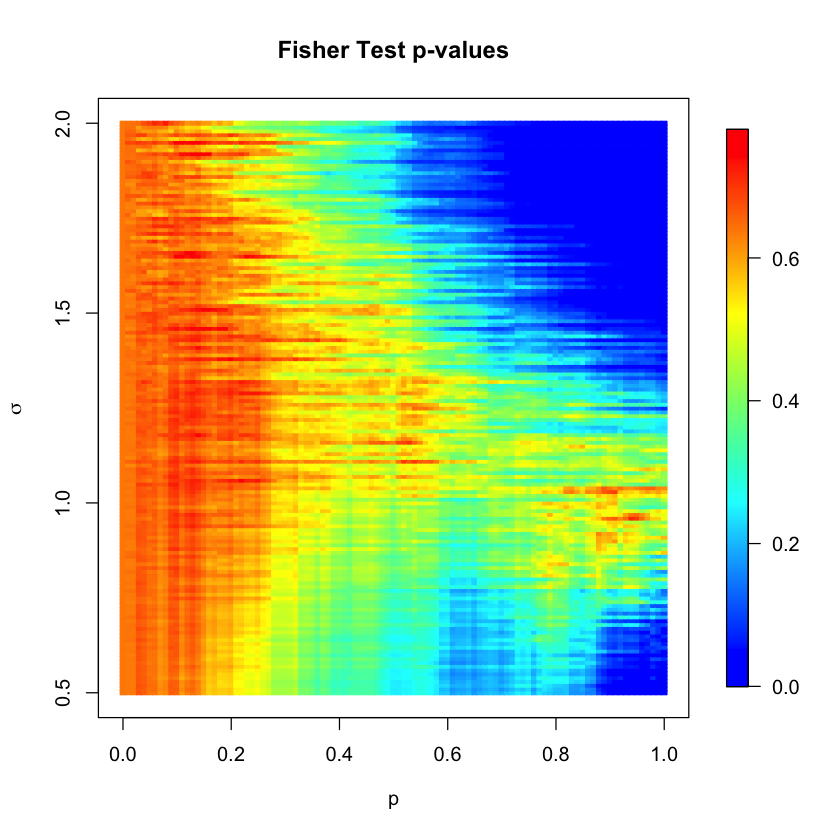

In [9]:
N       <- length(p1)
M       <- length(sigma2)

grid    <- expand.grid(x=p1, y=sigma2)

sigma.matr <- matrix(grid$x, nrow=N, ncol=M)
p.matr <- matrix(grid$y, nrow=N, ncol=M)

image.plot(sigma.matr, p.matr, PV_M, 
       col = colorRampPalette(c("blue", "cyan", "yellow", "red"))(1024), 
       main="Fisher Test p-values", xlab=expression(p), ylab=expression(sigma))